In [1]:
require(ggplot2)
require(data.table)
require(Hmisc)
require(ggthemes)
require(gridExtra)
require(grid)
require(lattice)
require(scales)
require(RColorBrewer)

Loading required package: ggplot2
Loading required package: data.table
Loading required package: Hmisc
Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, units

Loading required package: ggthemes
Loading required package: gridExtra
Loading required package: grid
Loading required package: scales
Loading required package: RColorBrewer


In [2]:
directory = "../../../../results/benchmarks/vswitch-adding-headers/throughput/"
blues = brewer.pal(n = 6, "Blues")[4:6]
plotTheme <- theme_hc() + theme(legend.title=element_blank(), legend.position="none", legend.text=element_text(size=8))

In [3]:
throughputCombinedHeaders <- fread(paste(directory, "throughput_combined_headers.csv", sep="/"), sep=",", header=TRUE)

In [4]:
head(throughputCombinedHeaders)

numHeaders,Mpps,Mbps,Gbps
0,14.54,20000.08,19.53133
0,14.54,19999.63,19.53089
0,14.53,19995.91,19.52726
0,14.54,19999.68,19.53094
0,14.54,20000.03,19.53128
0,14.54,19999.69,19.53095


In [5]:
p1 <- ggplot(throughputCombinedHeaders, aes(y=Mpps, x=factor(numHeaders), col="baseerat", fill="baseerat")) + 
 stat_summary(fun.data=mean_sdl, fun.args = list(mult=1), geom="bar", width=0.5, col="black") + 
 stat_summary(fun.data=mean_sdl, fun.args = list(mult=1), geom="errorbar", width=0.2, color="black") +
 ylab("Throughput (Mpps)") +
 xlab("No. of p-rules") +
#  scale_color_tableau() +
#  scale_fill_tableau() +
 scale_color_manual(values=blues) +
 scale_fill_manual(values=blues) +
 plotTheme

In [6]:
ggsave(p1, height=3, width=4, file="vswitch-adding-headers-throughput-mpps.pdf")

In [7]:
p2 <- ggplot(throughputCombinedHeaders, aes(y=Gbps, x=factor(numHeaders), col="baseerat", fill="baseerat")) + 
 stat_summary(fun.data=mean_sdl, fun.args = list(mult=1), geom="bar", width=0.5, col="black") + 
 stat_summary(fun.data=mean_sdl, fun.args = list(mult=1), geom="errorbar", width=0.2, color="black") +
 ylab("Throughput (Gbps)") +
 xlab("No. of p-rules") +
#  scale_color_tableau() +
#  scale_fill_tableau() +
 scale_color_manual(values=blues) +
 scale_fill_manual(values=blues) +
 plotTheme

In [8]:
ggsave(p2, height=3, width=4, file="vswitch-adding-headers-throughput-gbps.pdf")

In [9]:
# throughputNoCombinedHeaders <- fread(paste(directory, "throughput_no_combined_headers.csv", sep="/"), sep=",", header=TRUE)

In [10]:
# head(throughputNoCombinedHeaders)

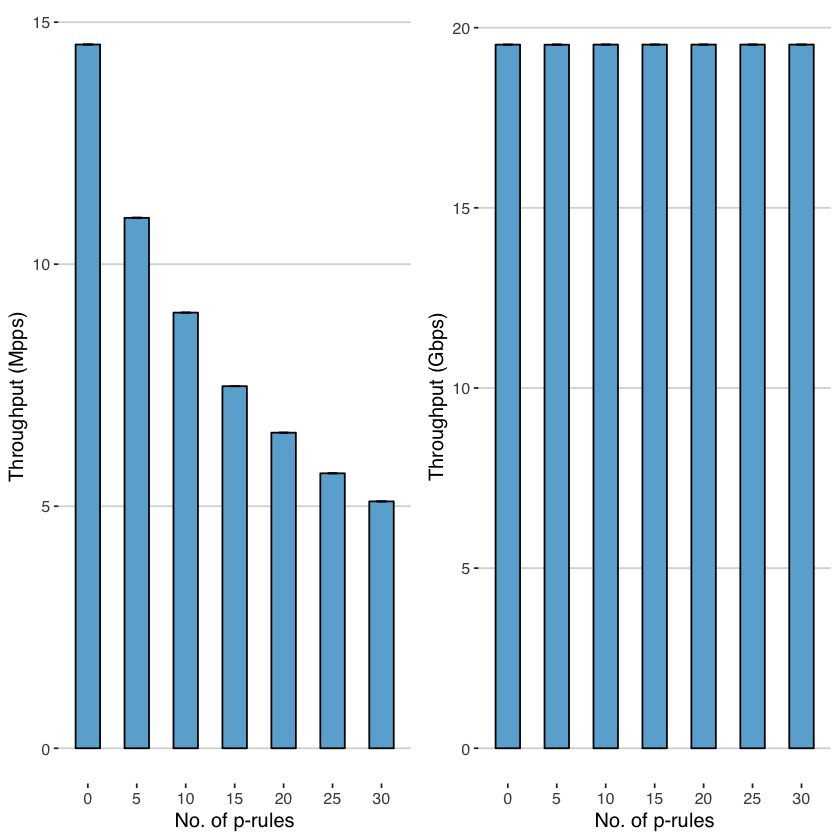

In [11]:
combined <- grid.arrange(p1, p2, ncol=2)
ggsave(combined, height=2, width=5, file="vswitch-adding-headers-throughput-all.pdf")

In [12]:
throughputSeparateHeaders <- fread(paste(directory, "throughput_separate_headers.csv", sep="/"), sep=",", header=TRUE)

In [13]:
head(throughputSeparateHeaders)

,numHeaders,Mpps,Mbps,Gbps
1,0.00000,14.54000,20000.08000,19.53133
2,0.00000,14.54000,19999.63000,19.53089
3,0.00000,14.53000,19995.91000,19.52726
4,0.00000,14.54000,19999.68000,19.53094
5,0.00000,14.54000,20000.03000,19.53128
6,0.00000,14.54000,19999.69000,19.53095


In [14]:
p1 <- ggplot(throughputSeparateHeaders, aes(y=Mpps, x=factor(numHeaders), col="baseerat", fill="baseerat")) + 
 stat_summary(fun.data=mean_sdl, fun.args = list(mult=1), geom="bar", width=0.5, col="black") + 
 stat_summary(fun.data=mean_sdl, fun.args = list(mult=1), geom="errorbar", width=0.2, color="black") +
 ylab("Throughput (Mpps)") +
 xlab("No. of headers") +
 scale_color_tableau() +
 scale_fill_tableau() +
 plotTheme

In [18]:
p2 <- ggplot(throughputSeparateHeaders, aes(y=Gbps, x=factor(numHeaders), col="baseerat", fill="baseerat")) + 
 stat_summary(fun.data=mean_sdl, fun.args = list(mult=1), geom="bar", width=0.5, col="black") + 
 stat_summary(fun.data=mean_sdl, fun.args = list(mult=1), geom="errorbar", width=0.2, color="black") +
 ylab("Throughput (Gbps)") +
 xlab("No. of headers") +
 scale_color_tableau() +
 scale_fill_tableau() +
 plotTheme

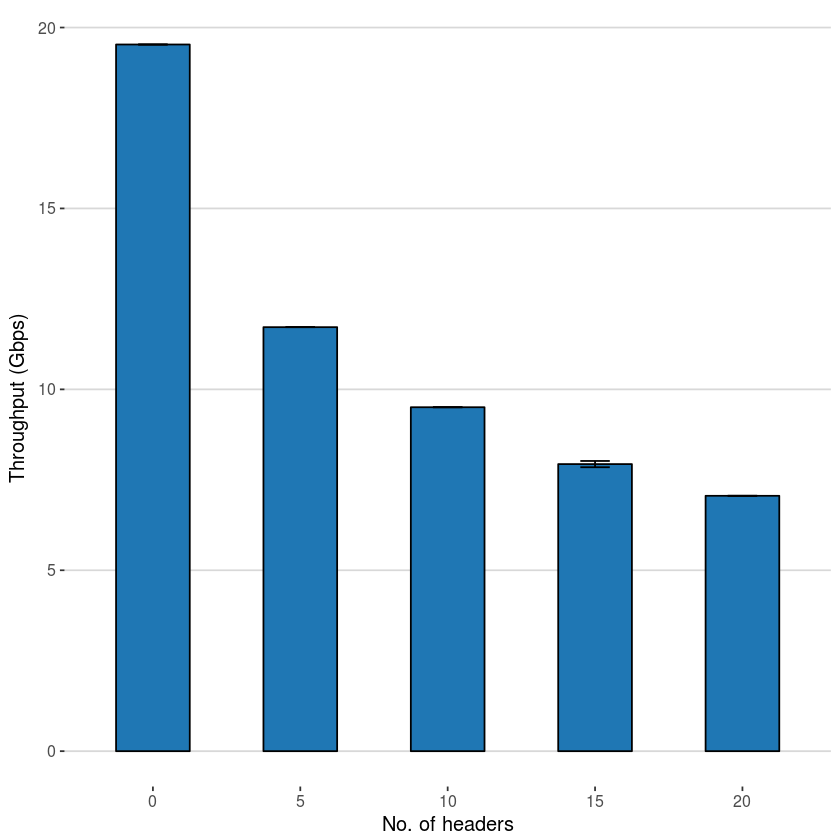

In [19]:
p2

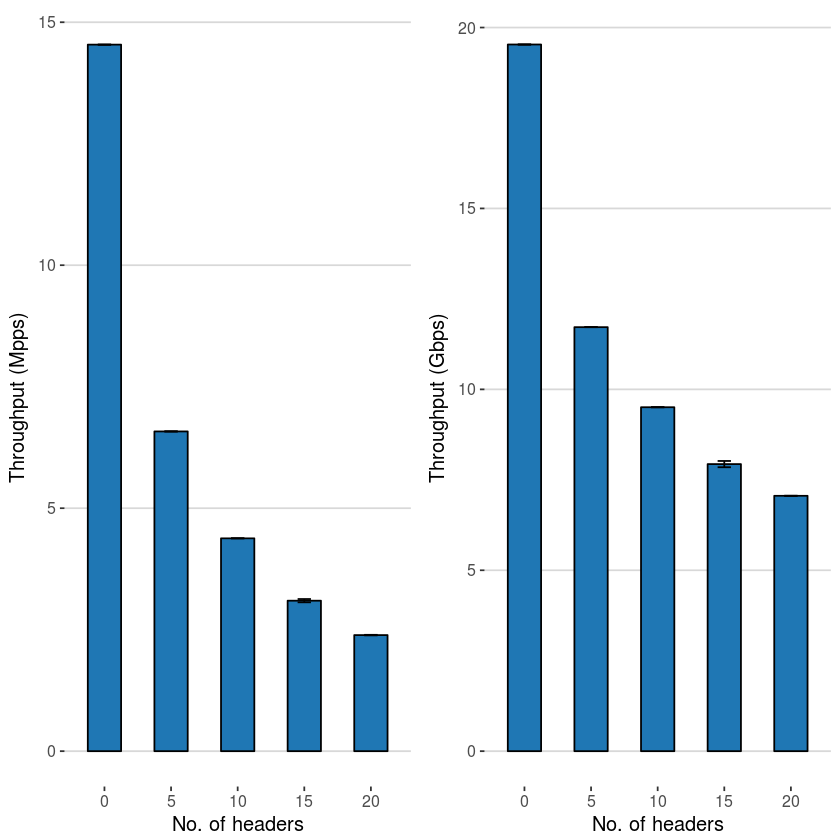

In [20]:
combined <- grid.arrange(p1, p2, ncol=2)
ggsave(combined, height=2, width=4.1, file="vswitch-separate-headers-throughput-all.pdf")